gen	nevals	min	avg    
0  	300   	689	1158.77
1  	245   	689	1028.02
2  	239   	538	909.587
3  	229   	489	803.7  
4  	247   	445	729.993
5  	239   	342	667.38 
6  	250   	342	597.19 
7  	252   	272	532.763
8  	249   	264	465.397
9  	250   	224	411.48 
10 	245   	217	357.667
11 	255   	134	317.667
12 	246   	134	280.203
13 	237   	103	251.517
14 	248   	103	229.01 
15 	249   	103	203.493
16 	248   	103	183.67 
17 	248   	95 	169.177
18 	240   	86 	152.1  
19 	240   	74 	139.787
20 	246   	73 	121.847
21 	242   	63 	109.88 
22 	245   	63 	103.863
23 	239   	52 	98.3333
24 	238   	52 	91.6767
25 	248   	31 	85.5867
26 	245   	31 	78.7767
27 	248   	31 	73.26  
28 	241   	31 	70.0667
29 	233   	31 	64.95  
30 	242   	31 	60.83  
31 	257   	30 	57.6833
32 	247   	29 	52.62  
33 	248   	21 	48.8367
34 	241   	19 	46.5733
35 	247   	16 	43.5   
36 	251   	14 	41.1533
37 	249   	14 	38.84  
38 	252   	13 	35.44  
39 	253   	13 	33.3367
40 	255   	13 	32.13  
41 	254   	12 	31.07  
42 	243   	

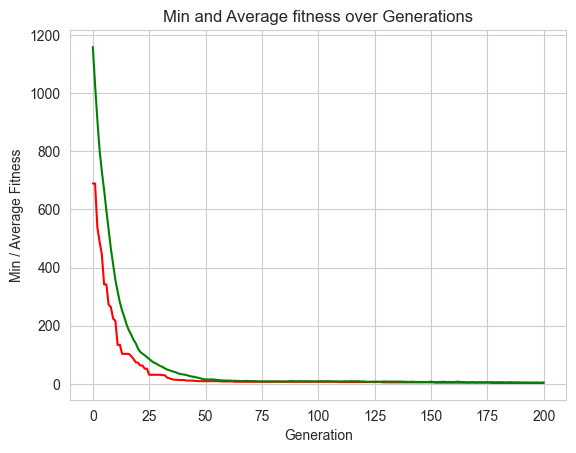

In [5]:
from deap import base, creator, tools

import random, numpy

import matplotlib.pyplot as plt
import seaborn as sns
from nurse import NurseSchedulingProblem

import sys
sys.path.insert(0, "C:/Jupyter/Evolution")
import elitysm

# problem constants:
HARD_CONSTRAINT_PENALTY = 10  # the penalty factor for a hard-constraint violation

# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create the nurse scheduling problem instance to be used:
nsp = NurseSchedulingProblem(HARD_CONSTRAINT_PENALTY)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(nsp))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def getCost(individual):
    return nsp.getCost(individual),  # return a tuple


toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(nsp))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitysm.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])
    print()
    print("-- Schedule = ")
    nsp.printScheduleInfo(best)

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()